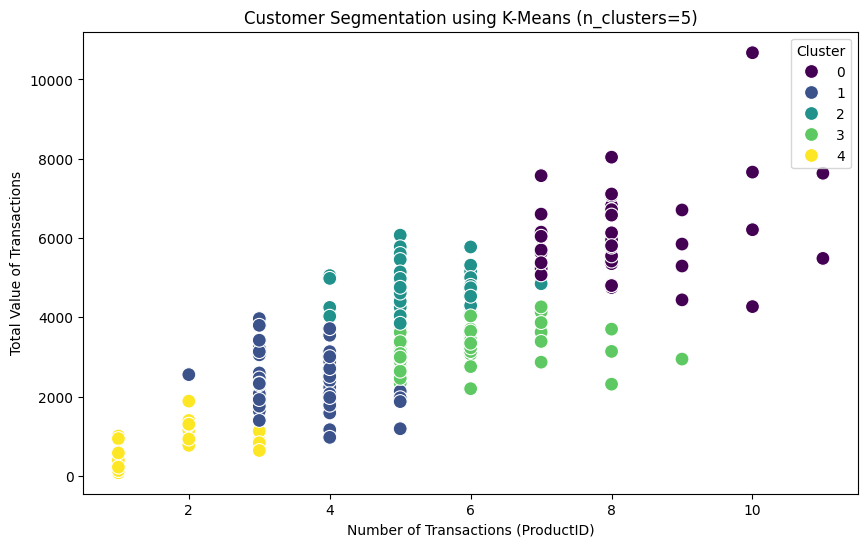

Number of clusters formed: 5
Davies-Bouldin Index: 0.8491558302577692


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv("D:/JN/Customers.csv")
transactions = pd.read_csv("D:/JN/Transactions.csv")


merged_data = pd.merge(transactions, customers, on='CustomerID')


customer_features = merged_data.groupby('CustomerID').agg({
    'ProductID': 'count',
    'TotalValue': 'sum',
    'Region': 'first'
}).reset_index()

customer_features = pd.get_dummies(customer_features, columns=['Region'])


scaler = StandardScaler()
numerical_features = customer_features[['ProductID', 'TotalValue']]
scaled_features = scaler.fit_transform(numerical_features)


n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)


db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])


plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features['ProductID'], y=customer_features['TotalValue'], hue=customer_features['Cluster'], palette='viridis', s=100)
plt.title(f'Customer Segmentation using K-Means (n_clusters={n_clusters})')
plt.xlabel('Number of Transactions (ProductID)')
plt.ylabel('Total Value of Transactions')
plt.legend(title='Cluster')
plt.show()


customer_features.to_csv('Customer_Segmentation_Results.csv', index=False)

print(f"Number of clusters formed: {n_clusters}")
print(f"Davies-Bouldin Index: {db_index}")

In [5]:
customer_features.head()

,CustomerID,ProductID,TotalValue,Region_Asia,Region_Europe,Region_North America,Region_South America,Cluster
0,C0001,5,3354.52,False,False,False,True,3
1,C0002,4,1862.74,True,False,False,False,1
2,C0003,4,2725.38,False,False,False,True,1
3,C0004,8,5354.88,False,False,False,True,0
4,C0005,3,2034.24,True,False,False,False,1
